In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
import random
import statistics
import skimage.io
import skimage.color


In [ ]:
def transform(x):
  x=(x-np.mean(x,axis=0))/np.std(x,axis=0)
  #print(x.shape)
  return x

In [ ]:
# X, y = make_classification(n_samples=50000, n_features=20, n_informative=10, n_redundant=5,
#                            n_classes=2, weights=[0.7], class_sep=0.6, random_state=15)
b = np.load('/content/drive/MyDrive/pneumoniamnist.npz')
train_images=b['train_images']
val_images=b['val_images']
test_images=b['test_images']
Y_train=b['train_labels']
Y_test=b['test_labels']
Y_val=b['val_labels']
train_image=[]
test_image=[]
val_image=[]
for i in range(len(train_images)):
  train_image.append(skimage.color.rgb2gray(train_images[i]))
for i in range(len(test_images)):
  test_image.append(skimage.color.rgb2gray(test_images[i]))
for i in range(len(val_images)):
  val_image.append(skimage.color.rgb2gray(val_images[i]))
train_image=np.array(train_image)
test_image=np.array(test_image)
val_image=np.array(val_image)
print(train_image.shape) 
X_train= train_image.reshape((train_images.shape[0],784))
X_test= test_image.reshape((test_images.shape[0],784))
X_val= val_image.reshape((val_images.shape[0],784))
X_train=transform(X_train)
X_val=transform(X_val)
X_test=transform(X_test)
# train_data=np.hstack((train_images,X_train))
# test_data=np.hstack((test_images,X_test))
# val_data=np.hstack((val_images,X_val))
X_train = np.hstack((X_train,np.ones(X_train.shape[0]).reshape((X_train.shape[0],1))))
X_test = np.hstack((X_test,np.ones(X_test.shape[0]).reshape((X_test.shape[0],1))))
X_val = np.hstack((X_val,np.ones(X_val.shape[0]).reshape((X_val.shape[0],1))))

(4708, 28, 28)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D 

In [ ]:
# def sigmoid(z):
#   if z < 0:
#     return 1 - 1/(1 + math.exp(z))
#   else:
#     return 1/(1 + math.exp(-z))


In [ ]:
def sigmoidp(z):
  return 1/(1 + np.exp(-z))
def sigmoidn(z):
  return 1 - 1/(1 + np.exp(z))


In [ ]:
def sigmoid(z):
  z[np.where(z>=0)]=sigmoidp(z[np.where(z>=0)])
  z[np.where(z<0)]=sigmoidn(z[np.where(z<0)])
  return z


In [ ]:
def grad_sigmoid(z):
  return sigmoid(z)*(1-sigmoid(z))

In [ ]:
def predict_proba(w,x,l):
  ypred=[]
  for i in range(len(x)):
    ypred.append(forward_prop(x[i],w,l)[2][1])
  return ypred

In [ ]:
def logloss(y_true,y_pred):  #cross entropy loss
  loss=np.sum(y_true*(np.log10(y_pred))+((np.ones_like(y_true)-y_true)*np.log10(np.ones_like(y_pred)-y_pred)))
  loss=-loss/len(y_true)
  return loss


In [ ]:
def forward_prop(X,w,l):
  x=X
  layer_inputs=[]
  layer_inputs.append(x)
  for i in range(1,l): #l is no. of layers 
    x1=np.dot(w[i-1].T,x) # add one to each x
    # for j in range(len(x1)):
    #   x1[j]=sigmoid(x1[j])
    x1=sigmoid(x1)
    #x1=transform(x1)
    layer_inputs.append(x1)
    x=x1
  return layer_inputs
  



In [ ]:
def backward_prop(layer_inputs,w,Y):
  #last layer
  n=len(layer_inputs)-1
  w_new=w.copy()
  l=layer_inputs[-1]
  l1=layer_inputs[-2]
  W=w[-1]
  # k=(l-Y)*l*(1-l)
  k=l-Y
  # print(k.shape)
  delta=k
  dj_w=np.zeros_like(W)
  m,n1=W.shape
  # for i in range(0,m):
  #   for j in range(0,n1):
  #     # print(k[j])
  #     dj_w[i][j]=k[j]*l1[i]+W[i][j]
  l1_n=np.reshape(l1,(m,1))
  k_n=np.reshape(k,(n1,1))
  # dj_w=np.dot(l1_n,k_n.T)+W #L2 regularizer
  k=W.copy()
  k[k>0]=1
  k[k<0]=-1
  dj_w=np.dot(l1_n,k_n.T)+k #L1 regularizer
  lambda1=0.001
  W=W-(lambda1*dj_w)
  w_new[-1]=W
  n=n-1
  # hidden layers
  while(n>0):
    # print(n)
    a=[]
    for j in range(len(layer_inputs[n])):
      z=0
      for s in range(len(layer_inputs[n+1])):
        z+=delta[s]*w[n][j][s]
      a.append(z)
    a=np.array(a)
    l=layer_inputs[n]
    l1=layer_inputs[n-1]
    b=l*(1-l)
    delta=a*b
    k=delta
    W=w[n-1]
    dj_w=np.zeros_like(W)
    m,n1=W.shape
    # for i in range(0,m):
    #   for j in range(0,n1):
    #     dj_w[i][j]=k[j]*l1[i]+W[i][j]
    l1_n=np.reshape(l1,(m,1))
    k_n=np.reshape(k,(n1,1))
    # dj_w=np.dot(l1_n,k_n.T)+W #L2 regularizer
    k=W.copy()
    k[k>0]=1
    k[k<0]=-1
    dj_w=np.dot(l1_n,k_n.T)+k #L1 regularizer
    lambda1=0.001
    W=W-(lambda1*dj_w)
    w_new[n-1]=W
    n=n-1
  return w_new





In [ ]:
def onehotencoding(a):
  if a==0:
    return np.array([1,0])
  else:
    return np.array([0,1])

In [ ]:
w=[]
l=3
nodes_list=[785,785,2]
for i in range(len(nodes_list)-1):
  w.append(np.random.randn(nodes_list[i],nodes_list[i+1]))
epochs = 10
train_loss=[]
test_loss=[]
weights=[]
for i in range(epochs):
  for j in range(len(X_train)):
    Y = onehotencoding(Y_train[j])
    layer_inputs = forward_prop(X_train[j],w,l)
    w = backward_prop(layer_inputs,w,Y)
  ypred=predict_proba(w,X_train,l)
  train_loss.append(logloss(Y_train,ypred))
  ypred=predict_proba(w,X_test,l)
  test_loss.append(logloss(Y_test,ypred))
  weights.append(w)
  print(i)
w=weights[np.argmin(test_loss)]


0
1
2
3
4
5
6
7
8
9


In [ ]:
def accuracy(y_test,y_pred):
  count =0
  for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
      count+=1
  accuracy = count*100/len(y_pred)
  return accuracy

In [ ]:
def predict(w,x,l):
  y=forward_prop(x,w,l)[2]
  max1=y[0]
  if(max1<y[1]):
    max1=1
  else:
    max1=0
  return max1

In [ ]:
y_pred=[]
for i in range(len(X_test)):
  y_pred.append(predict(w,X_test[i],l))
acc=accuracy(Y_test,y_pred)

In [ ]:
print(acc)

62.5


In [ ]:
y_pred=[]
for i in range(len(X_val)):
  y_pred.append(predict(w,X_val[i],l))
acc=accuracy(Y_val,y_pred)

In [ ]:
print(acc)

74.23664122137404


In [ ]:
y_pred=[]
for i in range(len(X_train)):
  y_pred.append(predict(w,X_train[i],l))
acc=accuracy(Y_train,y_pred)
print(acc)

74.21410365335599


In [ ]:
# np.savetxt("sample1.txt", w[1], delimiter =", ")

Text(0, 0.5, 'train loss')

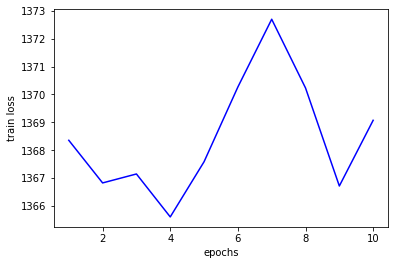

In [ ]:
import matplotlib.pyplot as plt
epochs_list=[i for i in range(1,len(train_loss)+1)]
fig,ax=plt.subplots()
ax.plot(epochs_list,train_loss,'b-')
ax.set_xlabel("epochs")
ax.set_ylabel("train loss")

Text(0, 0.5, 'test loss')

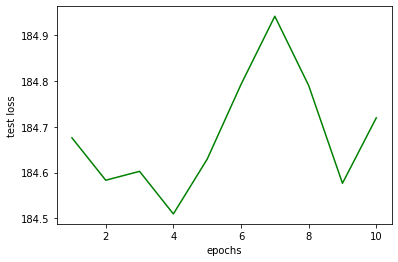

In [ ]:
import matplotlib.pyplot as plt
epochs_list=[i for i in range(1,len(test_loss)+1)]
fig,ax=plt.subplots()
ax.plot(epochs_list,test_loss,'g-')
ax.set_xlabel("epochs")
ax.set_ylabel("test loss")


In [ ]:
def get(y_test,y_pred):
  # # check len(y_pred) and len(y_test) matching are not:
  # if (len(y_test)!=len(y_pred)):
  #   print('Invalid lengths of y_test and y_pred\n')
  #   return;
  true_pos=0
  true_neg=0
  false_pos=0
  false_neg = 0

  for i in range(len(y_pred)):
    if(y_test[i]==1 and y_pred[i]==1):
      true_pos +=1
    elif(y_test[i]==0 and y_pred[i]==0):
      true_neg +=1
    elif(y_test[i]==0 and y_pred[i]==1):
      false_pos +=1
    elif(y_test[i]==1 and y_pred[i]==0):
      false_neg +=1
  
  return true_pos,true_neg,false_pos,false_neg

In [ ]:
def tpr(y_test,y_pred):
  tp,tn,fp,fn = get(y_test,y_pred)
  tpr = tp/(tp+fn)
  return tpr

def fpr(y_test,y_pred):
  tp,tn,fp,fn = get(y_test,y_pred)
  fpr = fp/(fp+tn)
  return fpr

In [ ]:
from sklearn import metrics
def ROC_AUC(y_test,y_pred):
  # tpr vs fpr plot is ROC
  tpr_list = []
  fpr_list=[]
  # y_pred = y_pred.sort()
  y_pred = np.array(y_pred)
  for thresh in np.arange(0,1.1,0.1):
    a = np.where(y_pred>=thresh,1,0)
    tpr_list.append(tpr(y_test,a))
    fpr_list.append(fpr(y_test,a))

  plt.plot(fpr_list,tpr_list,'b',lw=2)
  # plt.plot([0, 1], [0, 1], 'k-', lw=2)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.show()
  # print(tpr_list)
  # print(fpr_list)
  y_pred = np.where(y_pred>=0.5,1,0)
  #We use Trapezoidal rule to calculate the area under the curve and approximating the intergral  
  # auc = sum(np.trapz(tpr_list,fpr_list))+1
  return metrics.roc_auc_score(y_test, y_pred)

In [ ]:
def confusion_matrix(y_test,y_pred):
  m = np.unique(y_test)
  y_pred = np.array(y_pred)
  y_pred = np.where(y_pred>=0.5,1,0)
  tp,tn,fp,fn = get(y_test,y_pred)
  confusion_mat = np.array([tp,fp,fn,tn]).reshape(2,2)
  confusion_mat = pd.DataFrame(confusion_mat, columns = ['actual_pos','actual_neg'], index = ['pred_pos', 'pred_neg'])
  return confusion_mat

def f1_score(y_test,y_pred):
  #  # check len(y_pred) and len(y_test) matching are not:
  # if (len(y_test)!=len(y_pred)):
  #   print('Invalid lengths of y_test and y_pred\n')
  #   return;
  y_pred = np.array(y_pred)
  y_pred = np.where(y_pred>=0.5,1,0)
  true_pos=0
  true_neg=0
  false_pos=0
  false_neg = 0
  for i in range(len(y_pred)):
    if(y_test[i]==[1] and y_pred[i]==1):
      true_pos +=1
    elif(y_test[i]==[0] and y_pred[i]==0):
      true_neg +=1
    elif(y_test[i]==[0] and y_pred[i]==1):
      false_pos +=1
    elif(y_test[i]==[1] and y_pred[i]==0):
      false_neg +=1

  recall  = true_pos/(true_pos+false_neg)
  precision = true_pos/(true_pos+false_pos)
  f1_score = (2*precision*recall)/(precision+recall)

  return f1_score

In [ ]:
y_pred=[]
for i in range(len(X_test)):
  y_pred.append(predict(w,X_test[i],l))
acc=accuracy(Y_test,y_pred)

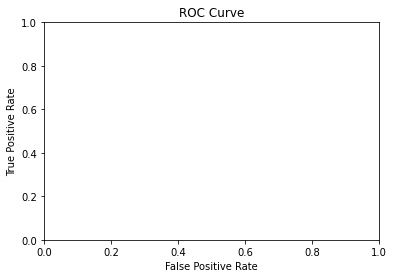

0.5


In [ ]:
print(ROC_AUC(Y_test,y_pred))

In [ ]:
print(f1_score(Y_test,y_pred))

0.7692307692307693


In [ ]:
print(acc)

62.5
